In [210]:
load('../etala_utilities.sage')

### ETALA lesson 12
# Group Assignment
__Problems:__  
  * 6.7: 1, 3, 21, 23, 25
  * 6.8: 1, 2, 10, 13
  * Problem 5 in the 2012, Q1 exam
  * Problem 3, 4 and 5 in the 2013, Q3 exam

## Chapter 6.7

### Problem 1  
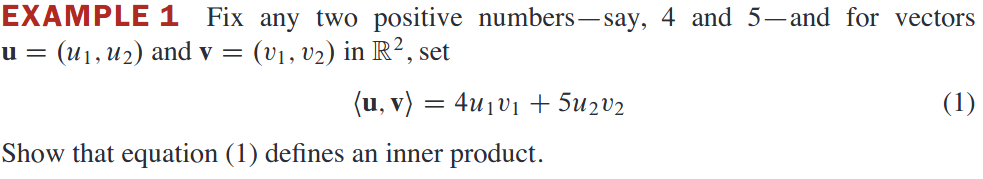  

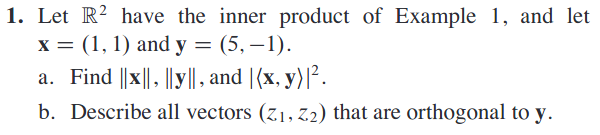

Here $\Vert\boldsymbol x\Vert = \sqrt{\langle \boldsymbol x, \boldsymbol x \rangle}$ is used to calculate the lengths:

In [4]:
def inner_product_R2(x, y):
    return 4*x[0]*y[0] + 5*x[1]*y[1]
x = [1, 1]
y = [5, -1]
x_len = sqrt(inner_product_R2(x, x)); show_var()
y_len = sqrt(inner_product_R2(y, y)); show_var()
inner_p_squared = abs(inner_product_R2(x, y))^2; show_var()

\text{x_len} = 3

\text{y_len} = \sqrt{105} \sim 10.2

\text{inner_p_squared} = 225

For b. this means all vectors such that $\bs y$

### Problem 3
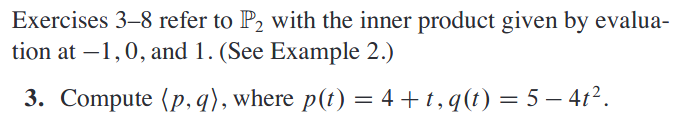

when the inner product is given by evaluation at the specified points, the formula for the inner product on $\Bbb P_2$ is:  
$ \langle p,q \rangle = p(-1)q(-1) + p(0)q(0) + p(1)q(1) $

In [12]:
var('t')
p(t) = 4 + t
q(t) = 5-4*t^2
inner_pq = sum((p(u)*q(u) for u in (-1, 0, 1))); show_var()

\text{inner_pq} = 28

### Problem 21
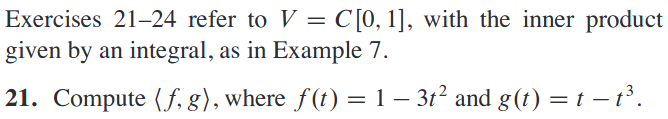

In [13]:
f(t) = 1-3*t^2
g(t) = t - t^3
inner_fg = integral(f*g, t, 0, 1); show_var()

\text{inner_fg} = 0

### Problem 23
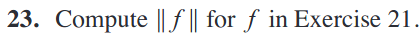

In [14]:
len_f = sqrt(integral(f*f, t, 0, 1))
show_var('len_f')

\text{len_f} = 2 \, \sqrt{\frac{1}{5}} \sim 0.894

### Problem 25
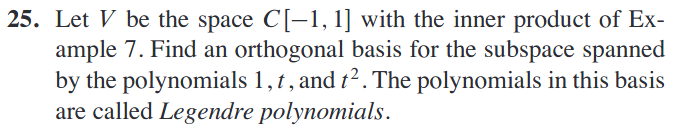

Using the integral inner product for continuous functions:  
$ \langle f, g \rangle = \int_a^b{f(t)g(t)}dt $  
the given polynomials can firstly be checked for orthogonality:

In [118]:
a = -1
b = 1
def innerp(f,g):  # The inner product for C[-1, 1]
    return integral(f*g, t, a, b)
p_1(t) = 1
p_2(t) = t
p_3(t) = t^2
inner_p_12 = innerp(p_1, p_2); show_var('inner_p_12')
inner_p_13 = innerp(p_1, p_3); show_var('inner_p_13')
inner_p_23 = innerp(p_2, p_3); show_var('inner_p_23')


0
0.000


\text{inner_p_12} = 0 = 0.000

\frac{2}{3}
0.667


\text{inner_p_13} = \frac{2}{3} = 0.667

0
0.000


\text{inner_p_23} = 0 = 0.000

Since this shows that polynomials 1 and 2 are orthogonal and 2 and 3 are as well, either of those pairs could be chosen to be in the orthogonal basis for the subspace spanned by the three functions.  
Choosing 1 and 2, a third basis can be calculated using the gram-schimdt process:  
To determine the third basis, $\text{proj}_{W_{12}}p_3$ is subtracted from $p_3$, where $W_{12}$ is the subspace $\text{Span}\left\{p_1, p_2\right\}$. This will then produce the final element of the orthogonal basis for $\text{Span}\left\{p_1, p_2, p_3\right\}$

In [116]:
proj_w12_p3 = sum((p * innerp(p_3, p) / innerp(p, p) for p in (p_1, p_2)))
b_3 = p_3 - proj_w12_p3
basis = (p_1, p_2, b_3)

which produces the following basis {{r'$\left\{' + ', '.join((str(b(t)) for b in basis)) + r'\right\}$'}}

## Chapter 6.8

### Problem 1
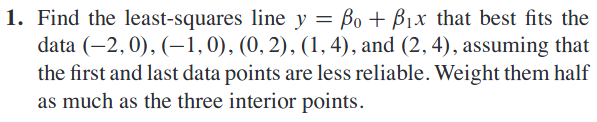

Firstly the relevant matrices are constructed:

Then the normal equations $X^TX\beta=X^Ty$ would normally be used to find the least squares solution. In order to weight the different data points, the matrix W is constructed with the weights along it's diagonal, and the normal equations are altered to become:  
$\left(WX\right)^T WX\beta = \left(WX\right)^T Wy $  
Iff the least squares problem has only one solution, the matrix $\left(WX\right)^T WX$ is invertible, and the solution can be found easily as  
$\beta = \left(\left(WX\right)^T WX\right)^{-1}\left(WX\right)^T Wy $  

In [ ]:
%display latex 
var('beta_0, beta_1')
W = Matrix.diagonal([1, 2, 2, 2, 1])
X = Matrix([[1, x] for x in range(-2, 3)])
beta = vector([beta_0, beta_1])
y = vector([0, 0, 2, 4, 4])

WXT = (W*X).transpose() 
beta_hat = (WXT*W*X).inverse()*WXT*W*y
var('y, x')
line = y == beta_hat[0]+beta_hat[1]*x; line

### Problem 2
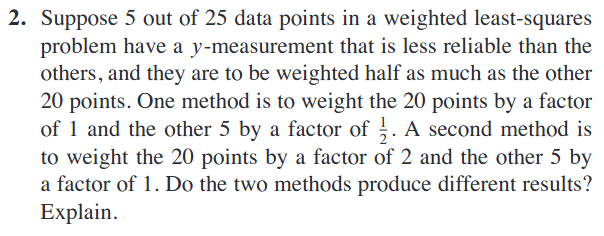

Since the weight are applied to both sides of the equation solved, the solution to the equations are the same as long as the relation between the individual weights are the same. To formalize this argument, multiplying the entire weight matrix by some constant $c$, the normal equations become:  
$\left(cWX\right)^T cWX\beta = \left(cWX\right)^T cWy $  
$ \Leftrightarrow c^2 \left(\left(WX\right)^T WX\beta\right) = c^2 \left(\left(WX\right)^T Wy\right) $   
now since the equation could be divided through be $c^2$, it is clear that $c$ has no influence on the solution to the equation.

### Problem 10
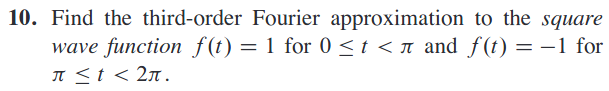

Using the inner product space $C[0, 2\pi]$, the n'th order fourier approximation of $f$ can be constructed as the projection of $f$ onto the subspace $W_n = \text{Span}\left\{1, cos(t), cos(2t), \dots, cos(nt), sin(t), sin(2t), \dots, sin(nt)\right\}$.  
Using the formula:  
$$ proj_Wf = \frac{\langle f, u_1 \rangle}{\langle u_1, u_1 \rangle} u_1 + \dots + \frac{\langle f, u_p \rangle}{\langle u_p, u_p \rangle} u_p $$  
where $W = \text{Span}\left\{u_1, u_2, \dots, u_p\right\} $

In [34]:
from sage.symbolic.integration.integral import definite_integral  #regular integral function seems to have an issue with the piecewise
var('t')
a, b = 0, 2*pi
f = piecewise([(RealSet.closed_open(0, pi), 1), ([pi, 2*pi], -1)], var=t); show_var()
def innerp(f, g):
    return (f*g).integral(t, a, b)
test = innerp(f,1); show_var()
a_0 = 2 * innerp(f, 1)/innerp(1, 1); show_var()
a_1, a_2, a_3 = (innerp(f, cos(k*t))/innerp(cos(k*t), cos(k*t)) for k in (1,2,3)); show_var()
float(a_1)

\text{f} = piecewise\left(\left(\left(\text{\texttt{[0,{ }pi)}}, 1\right), \left(\text{\texttt{[pi,{ }2*pi]}}, -1\right)\right), t\right)

TypeError: self must be a numeric expression

## Exam set 2012 Q1

### Problem 5
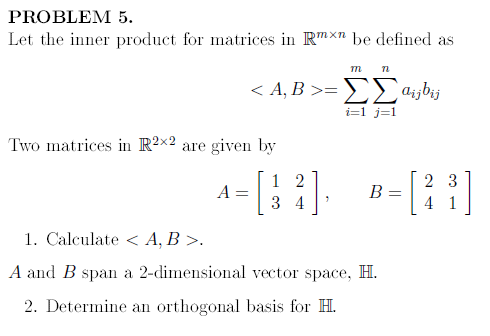

In [122]:
A = Matrix([[1,2], [3,4]]); show_var()
B = Matrix([[2,3], [4,1]]); show_var()

\text{A} = \left(\begin{array}{rr}
1 & 2 \\
3 & 4
\end{array}\right)

\text{B} = \left(\begin{array}{rr}
2 & 3 \\
4 & 1
\end{array}\right)

Firstly the above definition of the matrix product (the standard for rectangular matrices btw) is defined as a function, and calculated for A and B:

In [92]:
def matrix_inner_product(A, B):
    assert (A.nrows(), A.ncols()) == (B.nrows(), B.ncols()), "Matrices must have identical dimensions"
    return sum([A[i,j]*B[i,j] for j in range(A.ncols()) for i in range(A.nrows())])
ans_1 = matrix_inner_product(A,B); show_var()

'truncate' is an invalid keyword argument for str()


\text{ans_1} = 24

Choosing one of the two spanning matrices, the gram-schmidt method can be used to determine the second matrix for the basis:

In [209]:
v_1 = A; show_var()
v_2 = B - ans_1/matrix_inner_product(A, A) * A ; show_var()

\text{v_1} = \left(\begin{array}{rr}
1 & 2 \\
3 & 4
\end{array}\right)

\text{v_2} = \left(\begin{array}{rr}
\frac{6}{5} & \frac{7}{5} \\
\frac{8}{5} & -\frac{11}{5}
\end{array}\right) = \left(\begin{array}{rr}
1.20 & 1.40 \\
1.60 & -2.20
\end{array}\right)

## Exam set 2013 Q3

### Problem 3
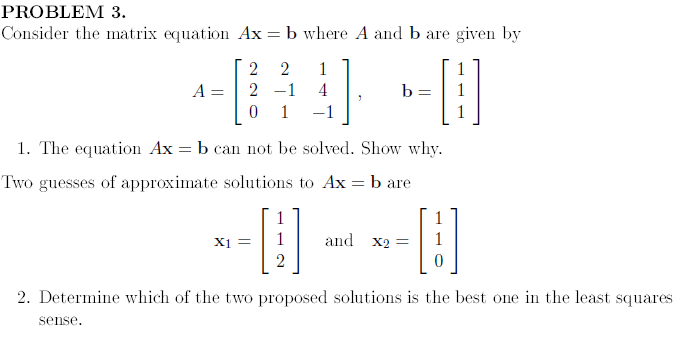